In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

import os
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/sample_submit.csv
../data/test.tsv
../data/train.tsv
../data/.ipynb_checkpoints\sample_submit-checkpoint.csv
../data/.ipynb_checkpoints\test-checkpoint.tsv
../data/.ipynb_checkpoints\train-checkpoint.tsv


In [68]:
train_df = pd.read_table('../data/train.tsv', index_col='Date', parse_dates=True)
test_df = pd.read_table('../data/test.tsv', index_col='Date', parse_dates=True)
sample_sub = pd.read_csv('../data/sample_submit.csv')

# all data
all_df = pd.concat([train_df, test_df], axis=0)
# set Test_Flag
all_df['Test_Flag'] = 0
all_df.loc[train_df.shape[0]: , 'Test_Flag'] = 1

## 特徴量の確認

In [73]:
print(train_df.columns.values)

['id' 'WSR0' 'WSR1' 'WSR2' 'WSR3' 'WSR4' 'WSR5' 'WSR6' 'WSR7' 'WSR8'
 'WSR9' 'WSR10' 'WSR11' 'WSR12' 'WSR13' 'WSR14' 'WSR15' 'WSR16' 'WSR17'
 'WSR18' 'WSR19' 'WSR20' 'WSR21' 'WSR22' 'WSR23' 'WSR_PK' 'WSR_AV' 'T0'
 'T1' 'T2' 'T3' 'T4' 'T5' 'T6' 'T7' 'T8' 'T9' 'T10' 'T11' 'T12' 'T13'
 'T14' 'T15' 'T16' 'T17' 'T18' 'T19' 'T20' 'T21' 'T22' 'T23' 'T_PK' 'T_AV'
 'T85' 'RH85' 'U85' 'V85' 'HT85' 'T70' 'RH70' 'U70' 'V70' 'HT70' 'T50'
 'RH50' 'U50' 'V50' 'HT50' 'KI' 'TT' 'SLP' 'SLP_' 'Precp' 'OZONE']


In [72]:
print(train_df.head(5))
print(test_df.head(2))

            id  WSR0  WSR1  WSR2  WSR3  WSR4  WSR5  WSR6  WSR7  WSR8  ...  \
Date                                                                  ...   
1998-01-01   0   0.8   1.8   2.4   2.1   2.0   2.1   1.5   1.7   1.9  ...   
1998-01-02   1   2.8   3.2   3.3   2.7   3.3   3.2   2.9   2.8   3.1  ...   
1998-01-03   2   2.9   2.8   2.6   2.1   2.2   2.5   2.5   2.7   2.2  ...   
1998-01-04   3   4.7   3.8   3.7   3.8   2.9   3.1   2.8   2.5   2.4  ...   
1998-01-05   4   2.6   2.1   1.6   1.4   0.9   1.5   1.2   1.4   1.3  ...   

            RH50    U50    V50    HT50     KI    TT      SLP  SLP_  Precp  \
Date                                                                        
1998-01-01  0.15  10.67  -1.56  5795.0 -12.10  17.9  10330.0 -55.0   0.00   
1998-01-02  0.48   8.39   3.84  5805.0  14.05  29.0  10275.0 -55.0   0.00   
1998-01-03  0.60   6.94   9.80  5790.0  17.90  41.3  10235.0 -40.0   0.00   
1998-01-04  0.49   8.73  10.54  5775.0  31.15  51.7  10195.0 -40.0   2.08  

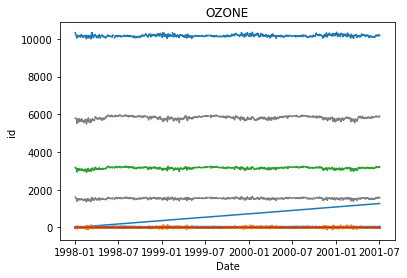

In [39]:
plt.title("OZONE")
# グラフのx軸とy軸の名前設定
plt.xlabel("Date")
plt.ylabel("OZONE")
# データのプロット
plt.plot(train_df)
plt.show()

In [66]:
# データの型と欠損値の有無を確認
train_df.info()
# 重複の確認
train_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1267 entries, 1998-01-01 to 2001-07-03
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1267 non-null   int64  
 1   WSR0    1240 non-null   float64
 2   WSR1    1240 non-null   float64
 3   WSR2    1239 non-null   float64
 4   WSR3    1240 non-null   float64
 5   WSR4    1240 non-null   float64
 6   WSR5    1240 non-null   float64
 7   WSR6    1241 non-null   float64
 8   WSR7    1244 non-null   float64
 9   WSR8    1243 non-null   float64
 10  WSR9    1241 non-null   float64
 11  WSR10   1241 non-null   float64
 12  WSR11   1242 non-null   float64
 13  WSR12   1243 non-null   float64
 14  WSR13   1241 non-null   float64
 15  WSR14   1241 non-null   float64
 16  WSR15   1243 non-null   float64
 17  WSR16   1243 non-null   float64
 18  WSR17   1244 non-null   float64
 19  WSR18   1243 non-null   float64
 20  WSR19   1240 non-null   float64
 21  WSR20   1240 non-nu

0

In [58]:
# 数値データの基本統計量
train_df.describe()
# カテゴリカルデータの基本統計量（今回はない）
# train_df.describe(include='O')
# 上記二つの基本統計量
# train_df.describe(include='all')

,id,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,OZONE
count,1267.000000,1240.000000,1240.000000,1239.000000,1240.000000,1240.000000,1240.000000,1241.000000,1244.000000,1243.000000,...,1191.000000,1154.000000,1154.000000,1192.00000,1186.000000,1190.000000,1205.000000,1159.000000,1267.000000,1267.000000
mean,633.000000,1.757984,1.703387,1.656255,1.628710,1.622097,1.636371,1.728364,2.110852,2.609654,...,0.281562,10.141031,0.456265,5815.91443,9.262858,37.227059,10164.373444,-0.431406,0.337293,0.087609
std,365.895705,1.335908,1.341402,1.304048,1.268962,1.255488,1.225321,1.217825,1.200062,1.225160,...,0.238205,9.920112,7.591077,81.80301,20.409650,11.168332,53.051031,35.247512,1.287986,0.282836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,...,0.010000,-14.920000,-22.990000,5480.00000,-53.600000,-10.100000,9995.000000,-135.000000,0.000000,0.000000
25%,316.500000,0.700000,0.600000,0.600000,0.600000,0.600000,0.700000,0.800000,1.200000,1.700000,...,0.085000,2.302500,-4.007500,5770.00000,-4.337500,32.000000,10130.000000,-20.000000,0.000000,0.000000
50%,633.000000,1.400000,1.400000,1.300000,1.300000,1.300000,1.400000,1.500000,1.900000,2.500000,...,0.210000,9.445000,-0.130000,5830.00000,13.350000,40.650000,10160.000000,0.000000,0.000000,0.000000
75%,949.500000,2.600000,2.500000,2.400000,2.300000,2.400000,2.300000,2.400000,2.900000,3.400000,...,0.440000,17.580000,4.515000,5880.00000,26.200000,44.900000,10190.000000,15.000000,0.030000,0.000000
max,1266.000000,7.500000,7.700000,7.100000,7.300000,7.200000,7.400000,7.400000,7.500000,9.200000,...,0.980000,41.360000,30.420000,5965.00000,42.050000,56.850000,10350.000000,140.000000,20.650000,1.000000


## 特徴量の可視化

<AxesSubplot:xlabel='OZONE', ylabel='count'>

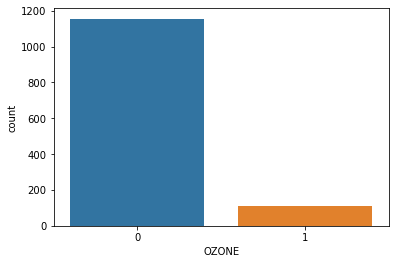

In [77]:
import seaborn as sns

sns.countplot(x='OZONE', data=train_df) 

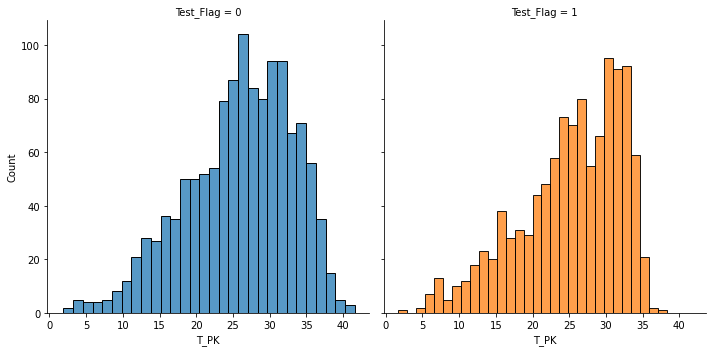

In [93]:
# 最高気温について可視化
fig = sns.FacetGrid(all_df, col='Test_Flag', hue='Test_Flag', height=5)
fig.map(sns.histplot, 'T_PK', bins=30, kde=False)

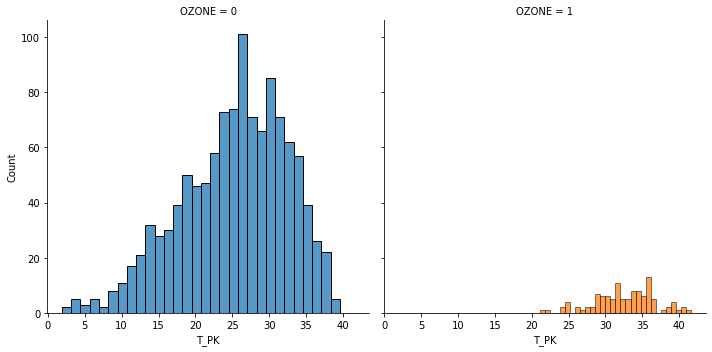

In [95]:
# 最高気温について可視化
fig = sns.FacetGrid(train_df, col='OZONE', hue='OZONE', height=5)
fig.map(sns.histplot, 'T_PK', bins=30, kde=False)

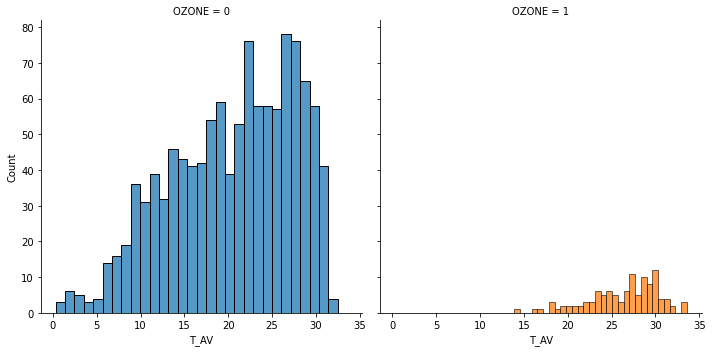

In [96]:
# 平均気温について可視化
fig = sns.FacetGrid(train_df, col='OZONE', hue='OZONE', height=5)
fig.map(sns.histplot, 'T_AV', bins=30, kde=False)

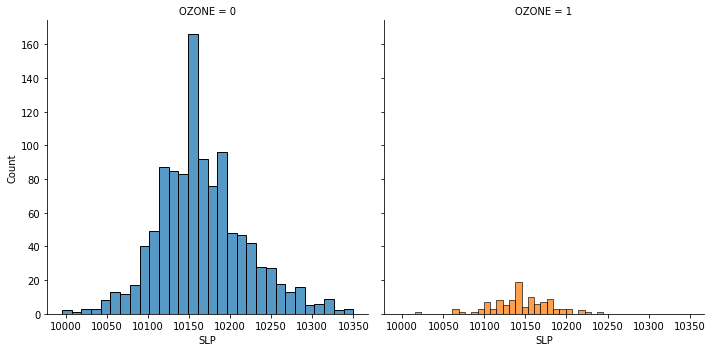

In [97]:
# 海面気圧について可視化
fig = sns.FacetGrid(train_df, col='OZONE', hue='OZONE', height=5)
fig.map(sns.histplot, 'SLP', bins=30, kde=False)

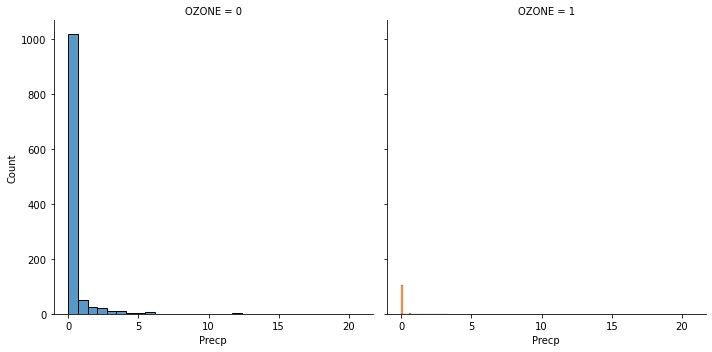

In [94]:
# 降水量について可視化
fig = sns.FacetGrid(train_df, col='OZONE', hue='OZONE', height=5)
fig.map(sns.histplot, 'Precp', bins=30, kde=False)